# Data Analysis - Programming
## Week 1
## Oefeningen

### Moeilijkheidsgraad

Omdat sommige van de onderstaande oefeningen wat lastiger zijn dan andere, is een indicatie van de moeilijkheidsgraad toegevoegd.

De volgende niveau's worden daarbij onderscheiden:
- <img src="images/stars_1.png" alt="1 star" style="display: inline" /> oefening van behandelde onderwerpen
- <img src="images/stars_2.png" alt="2 stars" style="display: inline" /> verdieping van behandelde onderwerpen
- <img src="images/stars_3.png" alt="3 stars" style="display: inline" /> uitdaging, stof tot nadenken

In [2]:
%pylab
%matplotlib inline
import scipy.stats as st
import pandas as pd

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


<img src="images/Jack_Sparrow.jpg" alt="Captain Jack Sparrow" style="float: right; margin-left: 20px" />
### Opgave 1

<span>a.</span> Bekijk het bestand data_01.csv en beschrijf de inhoud van de kolommen. <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />

<span>b.</span> Laadt de data in de kolom 'Global Average Temperature' in Python in en maak er een pandas.Series van. <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />

<span>c.</span> Schrijf een Python functie met twee argumenten genaamd `filename` en `column`. De functie dient de opgegeven kolom (0-based index) uit het opgegeven bestand te lezen en de inhoud terug te geven als een pandas.Series. Je mag er vanuit gaan dat de kolom numerieke data bevat. Test je functie door de kolommen in `data_01.csv` in te lezen met behulp van de functie. <img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />  
*Opmerking:* je kunt de functie naar wens natuurlijk uitbreiden met bijvoorbeeld: een boolean argument dat aangeeft of het bestand een header bevat, een argument dat aangeeft welk datatype de opgegeven kolom bevat of logica die zelf het meest geschikte datatype voor de kolom bepaalt.

<span>d.</span> Onderzoek of de variabelen 'Global Average Temperature' en 'Number of Pirates' lineaire correlatie vertonen. <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />  
  
De 'Church of the Flying Spaghetti Monster' stelt dat het fenomeen 'global warming' wordt veroorzaakt door het afnemend aantal piraten. [Deze open brief](http://www.venganza.org/about/open-letter/) aan het 'Kansas School Board' beschrijft dit inzicht. Lees voor informatie over het verschil tussen correlatie en oorzakelijk verband (causatie) bijvoorbeeld [deze blog](http://www.scilogs.com/in_scientio_veritas/correlation-causation-part-un/). <img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />  

<span>e.</span> Schrijf een Python-functie die, gegeven twee pandas.Series, de correlatie coëfficiënt `r` en de P-value berekent en teruggeeft als resultaat van de functie. <img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />  

<span>f.</span> Lees de documentatie van de `scipy.stats`-functie [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr). Controleer of de door jou in opgave 1d gevonden correlatie coëfficiënt en P-value overeenkomen met de output van `pearsonr`. <img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />  

**Opgave 1a**

Kolommen:
Year - jaar, geheel getal, discreet, interval meetniveau
Global Average Temperature - gemiddelde temperatuur van een jaar over de aarde, float, continu, interval meetniveau
Number of Pirates - aantal piraten op aarde, geheel getal, discreet, continu meetniveau

In [5]:
# Opgave 1b
with open("data/data_01.csv", "r") as f:
    f.readline()  # skip header
    index = []  # using indices is optional
    values = []
    for line in f:
        fields = line.rstrip().split(",")
        index.append(int(fields[0]))
        values.append(float(fields[1]))
avg_temp = pd.Series(values, index=index)
print(
    "Global Average Temperature, numerical summary:",
    avg_temp.describe(), 
    sep="\n"
)

Global Average Temperature, numerical summary:
count     7.000000
mean     14.914286
std       0.601189
min      14.200000
25%      14.450000
50%      14.800000
75%      15.350000
max      15.800000
dtype: float64


In [6]:
# Opgave 1c
def read_column(filename, column, index_column=None):
    with open(filename, "r") as f:
        f.readline()  # skip header
        index = []
        values = []
        for line in f:
            fields = line.rstrip().split(",")
            if index_column is not None:
                # assume index to be int
                index.append(int(fields[index_column]))
            values.append(float(fields[column]))
    if index is not None:
        return pd.Series(values, index=index)
    return pd.Series(values)

num_pirates = read_column("data/data_01.csv", 2, 0)
print(
    "Number of pirates:",
    num_pirates, 
    sep="\n"
)
print(
    "Number of pirates, numerical summary:",
    num_pirates.describe(), 
    sep="\n"
)

Number of pirates:
1820    35000.0
1860    30000.0
1880    20000.0
1920    15000.0
1940     5000.0
1960      400.0
2000       17.0
dtype: float64
Number of pirates, numerical summary:
count        7.000000
mean     15059.571429
std      14069.028915
min         17.000000
25%       2700.000000
50%      15000.000000
75%      25000.000000
max      35000.000000
dtype: float64


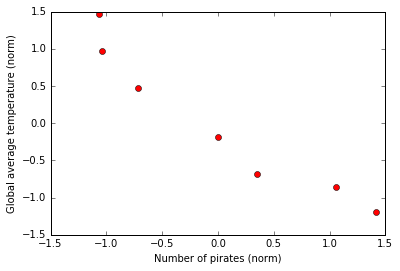

Correlatie coëfficiënt r = -0.9606
P-value = 0.0006


In [13]:
# Opgave 1d
# it is customary to display the explanatory variable on x-axis
# and response variable on y-axis
x = num_pirates
y = avg_temp
n = num_pirates.count()

xbar, sx = x.mean(), x.std(ddof=1)
ybar, sy = y.mean(), y.std(ddof=1)
zx = (x - xbar) / sx
zy = (y - ybar) / sy
plt.plot(zx, zy, 'ro')
plt.xlabel("Number of pirates (norm)")
plt.ylabel("Global average temperature (norm)")
plt.show()

r = np.dot(zx, zy) / (n - 1)
Pvalue = 2 * (1 - st.rdist.cdf(abs(r), n - 2))
print("Correlatie coëfficiënt r = {:.4f}".format(r))
print("P-value = {:.4f}".format(Pvalue))

In [16]:
# Opgave 1e
def calc_correlation_coeff(x, y):
    if len(x) != len(y):
        raise Exception("Series x and y should be same length!")
    n = len(x)

    xbar, sx = x.mean(), x.std(ddof=1)
    ybar, sy = y.mean(), y.std(ddof=1)
    zx = (x - xbar) / sx
    zy = (y - ybar) / sy
    
    r = np.dot(zx, zy) / (n - 1)
    Pvalue = 2 * (1 - st.rdist.cdf(abs(r), n - 2))

    return r, Pvalue

r, Pvalue = calc_correlation_coeff(x, y)
print("Correlatie coëfficiënt r = {:.4f}, P-value = {:.4f}".format(r, Pvalue))

Correlatie coëfficiënt r = -0.9606, P-value = 0.0006


In [22]:
r, Pvalue = st.pearsonr(x, y)
print("Correlatie coëfficiënt r = {:.4f}, P-value = {:.4f}".format(r, Pvalue))

Correlatie coëfficiënt r = -0.9606, P-value = 0.0006


### Opgave 2

De onderstaande cell bevat een Python functie die weerdata leest van de website van het KNMI. Output van de functie zijn de kolommen FG en TG in pandas.Series: windsnelheid in m/s en temperatuur in graden Celcius, beide daggemiddelden.  
Kijk of je het programma kunt lezen. Onderzoek vervolgens of de windsnelheid en de temperatuur lineaire samenhang vertonen. <img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />  

In [24]:
from datetime import date
import requests
from io import StringIO


def load_knmi_data(start=date(2015, 1, 1), end=date(2015, 12, 31), station=350):
    url = "http://projects.knmi.nl/klimatologie/daggegevens/getdata_dag.cgi"
    data = {
        "byear": start.year,
        "bmonth": start.month,
        "bday": start.day,
        "eyear": end.year,
        "emonth": end.month,
        "eday": end.day,
        "stations": station,
        "variable": "FG",
    }
    r = requests.post(url, data=data)
    if r.status_code == requests.codes.ok:
        # response op webrequest ontvangen,
        #   probeer eventueel r.text (een string) naar een bestand te printen
        #   om inzicht te krijgen in de data
        f = StringIO(r.text)  # use string as file
        # return columns 4 (FG, mean wind speed in m/s) and 11 (avg temperature in C)
        data = loadtxt(f, delimiter=",", usecols=(4, 11)) / 10
        return (
            pd.Series(data[:, 0]),
            pd.Series(data[:, 1]),
        )
    raise Exception("Error occurred loading data from knmi.nl!")

windspeed, temperature = load_knmi_data()

Windspeed:
count    365.000000
mean       3.742192
std        1.507518
min        1.200000
25%        2.700000
50%        3.500000
75%        4.600000
max       11.400000
dtype: float64
Temperature:
count    365.000000
mean      11.010959
std        5.711843
min       -2.800000
25%        6.700000
50%       11.200000
75%       14.400000
max       27.100000
dtype: float64


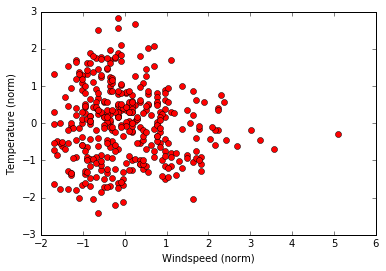

Correlatie coëfficiënt r = -0.0598, P-value = 0.2545


In [28]:
print("Windspeed:\n" + str(windspeed.describe()))
print("Temperature:\n" + str(temperature.describe()))

plt.plot(st.mstats.zscore(windspeed), st.mstats.zscore(temperature), "ro")
plt.xlabel("Windspeed (norm)")
plt.ylabel("Temperature (norm)")
plt.show()

r, Pvalue = st.pearsonr(windspeed, temperature)
print("Correlatie coëfficiënt r = {:.4f}, P-value = {:.4f}".format(r, Pvalue))